**Emotion_Detection**

**importing libraries**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("numpy version : ", np.__version__)
print("tensorflow version : ", tf.__version__)


numpy version :  1.26.4
tensorflow version :  2.18.0


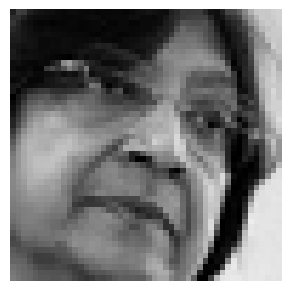

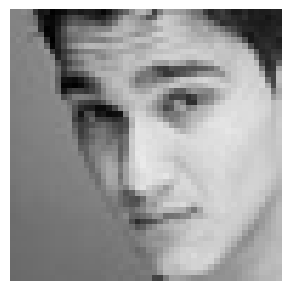

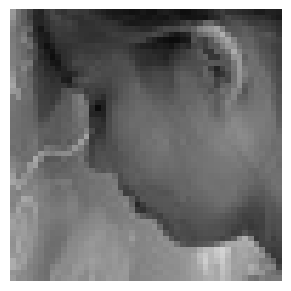

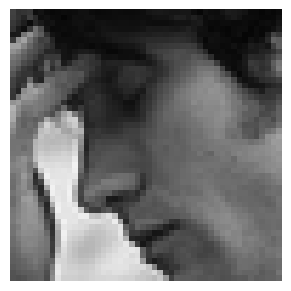

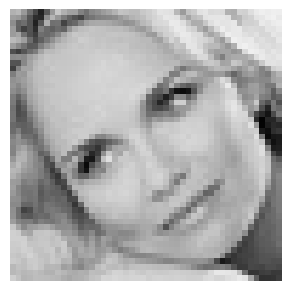

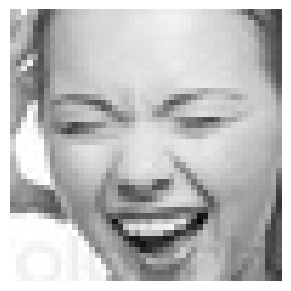

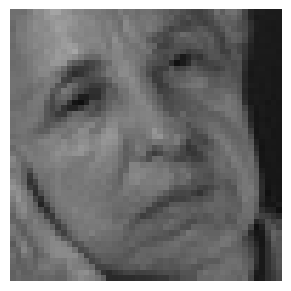

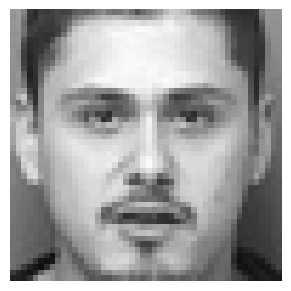

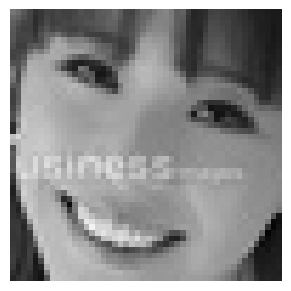

In [6]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize = (12,12))
    plt.subplot(331 + i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

**preparaing data for training**

In [8]:
img_size = 48
batch_size = 64
epochs = 30
learning_rate = 0.001
datagen_train = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)
train_generator = datagen_train.flow_from_directory("train/",target_size = (img_size,img_size), color_mode = "grayscale", batch_size = batch_size, class_mode = 'categorical', shuffle = True)

datagen_validation = ImageDataGenerator(
    rescale = 1.0/255
)
validation_generator = datagen_validation.flow_from_directory("test/",target_size = (img_size,img_size), color_mode = "grayscale", batch_size = batch_size, class_mode = 'categorical', shuffle = False)

Found 26393 images belonging to 8 classes.
Found 6254 images belonging to 8 classes.


**Defining Model**

In [10]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.3)(x)

    return x

In [16]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    return x

In [18]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(inputs, 64, (5,5))
    conv_3 = Convolution(inputs, 128, (3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)
    output = Dense(8,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])

    model.compile(loss = ['categorical_crossentropy'], optimizer = Adam(learning_rate = learning_rate), metrics = ['accuracy'])
    return model

In [ ]:
model = model_fer((img_size,img_size,2))
model.summary()

**Initialize Model**

In [26]:
checkpoint = ModelCheckpoint(
    "model_weights.h5",
    monitor = "val_accuracy",
    save_best_only = True,
    mode = "max",
    verbose = 1
)
reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-6
)
callbacks = [checkpoint, reduce_lr]
steps_per_epoch = int(train_generator.n/train_generator.batch_size)
validation_steps = int(validation_generator.n/validation_generator.batch_size)


**Training Model**

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

C:\Users\Mishika\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


C:\Users\Mishika\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 1))
  warnings.warn(msg)


412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.2425 - loss: 2.0465  
Epoch 1: val_accuracy improved from -inf to 0.29784, saving model to model_weights.h5


412/412 ━━━━━━━━━━━━━━━━━━━━ 206s 493ms/step - accuracy: 0.2426 - loss: 2.0461 - val_accuracy: 0.2978 - val_loss: 1.8177 - learning_rate: 0.0010
Epoch 2/30
  1/412 ━━━━━━━━━━━━━━━━━━━━ 2:59 438ms/step - accuracy: 0.2500 - loss: 1.7651

C:\Users\Mishika\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.29784
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2500 - loss: 1.7651 - val_accuracy: 0.2974 - val_loss: 1.8217 - learning_rate: 0.0010
Epoch 3/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.2903 - loss: 1.7541  
Epoch 3: val_accuracy did not improve from 0.29784
412/412 ━━━━━━━━━━━━━━━━━━━━ 209s 506ms/step - accuracy: 0.2904 - loss: 1.7541 - val_accuracy: 0.2796 - val_loss: 1.8854 - learning_rate: 0.0010
Epoch 4/30
  1/412 ━━━━━━━━━━━━━━━━━━━━ 3:12 468ms/step - accuracy: 0.3125 - loss: 1.7563
Epoch 4: val_accuracy did not improve from 0.29784

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
412/412 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3125 - loss: 1.7563 - val_accuracy: 0.2891 - val_loss: 1.8703 - learning_rate: 0.0010
Epoch 5/30
313/412 ━━━━━━━━━━━━━━━━━━━━ 47s 475ms/step - accuracy: 0.3202 - loss: 1.7088 

KeyboardInterrupt: 

# User
debug my model

**Model Evaluation**

In [ ]:
model.evaluate(validation_generator)

**Plotting Loss**

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(['Model loss'])
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplot_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25,  wspace = 0.35)
    

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(['Model Accuracy'])
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplot_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)
    

**SAVING MODEL**

In [ ]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)
